In [196]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

In [197]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [198]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [199]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [200]:
import numpy as np
import pandas as pd
 
X = pd.DataFrame(boston.data)
Y = pd.DataFrame(boston.target)

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()

scaler.fit(X)
scaler2.fit(Y)

X = scaler.transform(X)
Y = scaler2.transform(Y)

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [203]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex 2 Linear Reggresion

In [204]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
score = reg.score(X_train, Y_train)

coef = reg.coef_
print(score)
print(coef)

Y_pred = reg.predict(X_train)

print("predict: ", Y_pred)

0.7455344405641732
[[-0.10287246  0.13911655  0.04238362  0.10224507 -0.26066836  0.26284561
   0.01349353 -0.38877237  0.32552344 -0.2295506  -0.21762149  0.10370094
  -0.44239497]]
predict:  [[ 8.04033455e-01]
 [-1.97277938e+00]
 [ 2.20213735e-01]
 [-8.94189496e-01]
 [ 1.52948064e-01]
 [ 3.80027611e-01]
 [-5.11288676e-02]
 [ 1.39489334e+00]
 [ 8.82184764e-01]
 [ 4.32135237e-02]
 [-3.45307874e-01]
 [ 6.39255155e-01]
 [-3.96800995e-01]
 [ 4.67868033e-01]
 [ 7.83857622e-01]
 [-6.99107590e-01]
 [-7.83480557e-01]
 [ 9.54410439e-01]
 [ 2.19450997e-01]
 [-1.03337879e+00]
 [-2.14716771e-01]
 [ 1.36828908e+00]
 [ 7.36440687e-01]
 [-6.78433167e-01]
 [ 2.69835163e-03]
 [ 2.21035086e+00]
 [ 1.36943035e+00]
 [ 2.07915332e-01]
 [ 1.29308434e+00]
 [ 3.31765022e-02]
 [-1.46469839e+00]
 [-7.73201458e-01]
 [-8.12532510e-01]
 [ 3.34621484e-02]
 [ 1.07980361e+00]
 [-1.31518440e+00]
 [ 8.66683537e-01]
 [ 4.75826543e-01]
 [ 1.42037425e-03]
 [-5.29239564e-01]
 [-2.17046138e-01]
 [ 6.73373663e-01]
 [ 1.0745

In [205]:
print(Y_pred.shape)

(404, 1)


In [206]:
print(Y_train.shape)

(404, 1)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

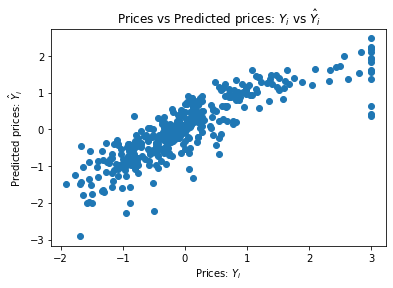

In [207]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [208]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_train, Y_pred)

print("MSE: ", MSE)

MSE:  0.259082069128375


In [209]:
score = reg.score(X_test, Y_test)
print(score)

0.6920749038652132


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(2)
poly_model.fit_transform(X)